##  **Processing and Applying Logistic Regression on Titanic Dataset 🚢⚓**


In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline

In [47]:
df = pd.read_csv('/content/titanic_train - titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
target=pd.DataFrame(df.iloc[:,1])

In [50]:
df.drop(['Pclass','PassengerId','Name','Ticket','Survived','Embarked'],axis=1,inplace=True)

In [45]:
df.isnull().mean()*100

Sex      0.0
Age      0.0
SibSp    0.0
Parch    0.0
Fare     0.0
dtype: float64

In [52]:
df.drop(['Cabin'],axis=1,inplace=True)

In [53]:
df

,Sex,Age,SibSp,Parch,Fare
0,male,22.0,1,0,7.2500
1,female,38.0,1,0,71.2833
2,female,26.0,0,0,7.9250
3,female,35.0,1,0,53.1000
4,male,35.0,0,0,8.0500
...,...,...,...,...,...
886,male,27.0,0,0,13.0000
887,female,19.0,0,0,30.0000
888,female,NaN,1,2,23.4500
889,male,26.0,0,0,30.0000


Text(0.5, 1.0, 'Age')

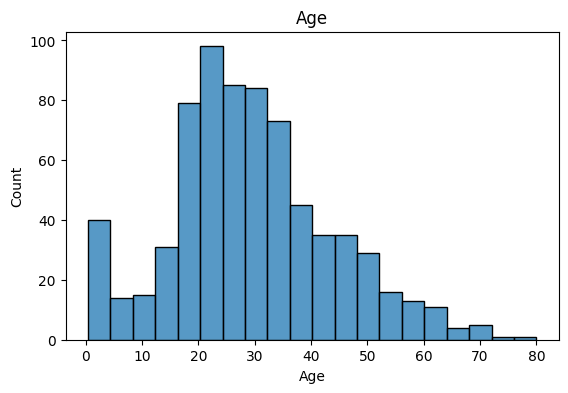

In [54]:
# Check the Distribution for numeric Columns

plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Age'])
plt.title('Age')



In [55]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [56]:
df.isnull().mean()*100

Sex      0.0
Age      0.0
SibSp    0.0
Parch    0.0
Fare     0.0
dtype: float64

In [57]:
transformers = [
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Sex']),
    ('scaler', StandardScaler(), ['Age', 'Fare']),
    ('Scal', MaxAbsScaler(), ['SibSp', 'Parch'])

]


In [58]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [59]:
tr = ColumnTransformer(transformers, remainder='passthrough')
tr

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex']),
                                ('scaler', StandardScaler(), ['Age', 'Fare']),
                                ('Scal', MaxAbsScaler(), ['SibSp', 'Parch'])])

In [60]:
X = df
y = target

X=tr.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


model = LogisticRegression()

model.fit(X_train,y_train)


# Predict
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7611940298507462